In [62]:
# import libraries
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np

In [63]:
# define functions
# calculate index of difficulty
def index_of_difficulty(key: tuple) -> float:
    return math.ceil(math.log2(key[1] / key[0]) + 1)

In [64]:
# import data
headers = ['size', 'distance', 'direction', 'time', 'errors']
participant_1 = pd.read_csv('data/participant1.csv', names=headers)
participant_6 = pd.read_csv('data/participant6.csv', names=headers)
participant_7 = pd.read_csv('data/participant7.csv', names=headers)
participant_16 = pd.read_csv('data/participant16.csv', names=headers)
participant_21 = pd.read_csv('data/participant21.csv', names=headers)
participant_25 = pd.read_csv('data/participant25.csv', names=headers)
participant_69 = pd.read_csv('data/participant69.csv', names=headers)
participant_420 = pd.read_csv('data/participant420.csv', names=headers)
participant_1123 = pd.read_csv('data/participant1123.csv', names=headers)
participant_2003 = pd.read_csv('data/participant2003.csv', names=headers)
participant_2804 = pd.read_csv('data/participant2804.csv', names=headers)
participant_6904 = pd.read_csv('data/participant6904.csv', names=headers)
participant_149025 = pd.read_csv('data/participant149025.csv', names=headers)
participant_8008504 = pd.read_csv('data/participant8008504.csv', names=headers)

participants = [participant_1, participant_6, participant_7, participant_16, participant_21, participant_25, participant_69, participant_1123, participant_2003, participant_2804, participant_6904, participant_149025, participant_8008504]

# combine data
data = pd.concat([participant_1, participant_6, participant_7, participant_16, participant_21, participant_25, participant_69, participant_1123, participant_2003, participant_2804, participant_6904, participant_149025, participant_8008504])

data.describe()

,size,distance,direction,time,errors
count,4196.000000,4196.000000,4196.000000,4.196000e+03,4196.000000
mean,74.995234,188.512869,0.010963,3.664359e+06,0.069590
std,53.762600,134.489119,1.000059,7.904599e+07,0.279485
min,20.000000,50.000000,-1.000000,3.023541e-01,0.000000
25%,20.000000,100.000000,-1.000000,6.227365e-01,0.000000
50%,40.000000,200.000000,1.000000,8.162060e-01,0.000000
75%,160.000000,400.000000,1.000000,1.029452e+00,0.000000
max,160.000000,400.000000,1.000000,1.708408e+09,5.000000


In [65]:
# remove outliers
data = data[data['time'] < 5]

# Calculate the upper limit
upper_limit = data['time'].quantile(0.95)

# Filter the dataframe
data = data[data['time'] < upper_limit]


In [66]:
separated_data = {}
x = []
y = []

for val1 in data['size'].unique():
    for val2 in data['distance'].unique():
        separated_data[(int(val1), int(val2))] = data[(data['size'] == val1) & (data['distance'] == val2)]

for key in separated_data:
    print(f"Size: {key[0]}\nDistance: {key[1]}")
    x.append(index_of_difficulty(key))
    y.append(x[-1] / separated_data[key]['time'].mean())
    print(f"Index of Difficulty: {x[-1]}")
    print(f"Mean time: {separated_data[key]['time'].mean()}")
    print(f"Standard deviation: {separated_data[key]['time'].std()}")
    print("\n")

Size: 40
Distance: 400
Index of Difficulty: 5
Mean time: 1.0245973091780372
Standard deviation: 0.18307655707058626


Size: 40
Distance: 200
Index of Difficulty: 4
Mean time: 0.9030886054935312
Standard deviation: 0.21493268083619335


Size: 40
Distance: 50
Index of Difficulty: 2
Mean time: 0.7763957002384942
Standard deviation: 0.2075645779536206


Size: 40
Distance: 100
Index of Difficulty: 3
Mean time: 0.8119255510840829
Standard deviation: 0.20102628831120542


Size: 160
Distance: 400
Index of Difficulty: 3
Mean time: 0.8166125557137273
Standard deviation: 0.20219057712282265


Size: 160
Distance: 200
Index of Difficulty: 2
Mean time: 0.6684406666440259
Standard deviation: 0.19121754643509264


Size: 160
Distance: 50
Index of Difficulty: 0
Mean time: 0.5754941549516261
Standard deviation: 0.16291609253587536


Size: 160
Distance: 100
Index of Difficulty: 1
Mean time: 0.605638025357173
Standard deviation: 0.18518804247836662


Size: 80
Distance: 400
Index of Difficulty: 4
Mean time:

'y = 0.88x + 0.8 -- R^2 = 0.95'

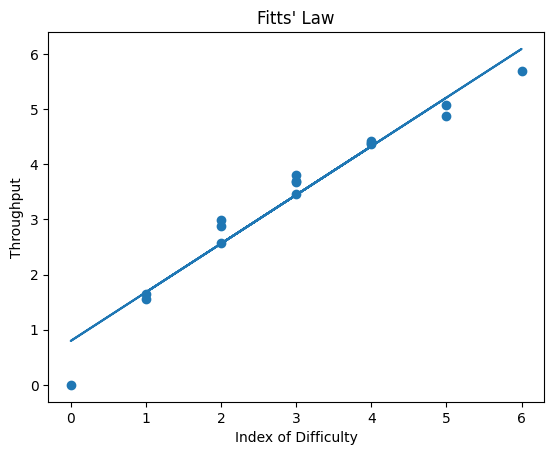

In [67]:
# Plot data
plt.scatter(x, y)
plt.xlabel('Index of Difficulty')
plt.ylabel('Throughput')
plt.title('Fitts\' Law')

# create a linear regression model
m, b = np.polyfit(x, y, 1)
plt.plot(x, [m*i + b for i in x])
f"y = {round(m, 2)}x + {round(b, 2)} -- R^2 = {round(np.corrcoef(x, y)[0, 1] ** 2, 2)}"